In [1]:
# [Source for tutorial](https://github.com/pgmpy/pgmpy/blob/dev/examples/Alarm.ipynb)
#
# Alarm Bayesian Network
# Creating the Alarm Bayesian network using pgmpy and doing some simple queries (mentioned in Bayesian Artificial Intelligence, Section 2.5.1: )

In [2]:
# Doing path-setting:

In [3]:
import os
import sys
from typing import *
from typing import Union, List, Any

from networkx.classes.reportviews import OutEdgeDataView, OutEdgeView
from pgmpy.independencies import Independencies
import itertools

os.getcwd()
# Setting the baseline:
os.chdir('/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP')


curPath: str = os.getcwd() + "/src/PgmpyStudy/"

dataPath: str = curPath + "data/"

imagePath: str = curPath + 'images/'

print("curPath = ", curPath, "\n")
print("dataPath = ", dataPath, "\n")
print('imagePath = ', imagePath, "\n")


# Making files in utils folder visible here: to import my local print functions for nn.Module objects
sys.path.append(os.getcwd() + "/src/utils/")
# For being able to import files within PgmpyStudy folder
sys.path.append(curPath)

sys.path

curPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/PgmpyStudy/ 

dataPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/PgmpyStudy/data/ 

imagePath =  /development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/PgmpyStudy/images/ 



['/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/PgmpyStudy',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python37.zip',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/lib-dynload',
 '',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/statisticallyfit/.ipython',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/utils/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/PgmpyStudy/']

In [4]:
# Science imports:

In [5]:
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import JointProbabilityDistribution

from src.utils.GraphvizUtil import *
from src.utils.NetworkUtil import *

In [6]:
# ## Problem Statement: 2.5.1 Earthquake
# **Example statement:** You have a new burglar alarm installed. It reliably detects burglary, but also responds to minor earthquakes. Two neighbors, John and Mary, promise to call the police when they hear the alarm. John always calls when he hears the alarm, but sometimes confuses the alarm with the phone ringing and calls then also. On the other hand, Mary likes loud music and sometimes doesn't hear the alarm. Given evidence about who has and hasn't called, you'd like to estimate the probability of a burglary alarm (from Pearl (1988)).
#

In [7]:
# Defining the network structure:
alarmModel: BayesianModel = BayesianModel([('Burglary', 'Alarm'),
                                           ('Earthquake', 'Alarm'),
                                           ('Alarm', 'JohnCalls'),
                                           ('Alarm', 'MaryCalls')])

# Defining parameters using CPT
cpdBurglary: TabularCPD = TabularCPD(variable = 'Burglary', variable_card = 2,
                                     values = [[0.999, 0.001]],
                                     state_names = {'Burglary' : ['False', 'True']})
print(cpdBurglary)
cpdEarthquake: TabularCPD = TabularCPD(variable = 'Earthquake', variable_card = 2,
                                       values = [[0.002, 0.998]],
                                       state_names = {'Earthquake' : ['True', 'False']})

print(cpdEarthquake)

cpdAlarm: TabularCPD = TabularCPD(variable = 'Alarm', variable_card = 2,
                                  values = [[0.95, 0.94, 0.29, 0.001],
                                            [0.05, 0.06, 0.71, 0.999]],
                                  evidence = ['Burglary', 'Earthquake'], evidence_card = [2,2],
                                  state_names = {'Alarm': ['True', 'False'], 'Burglary':['True','False'],'Earthquake': ['True', 'False']})
print(cpdAlarm)

cpdJohnCalls: TabularCPD = TabularCPD(variable = 'JohnCalls', variable_card = 2,
                                      values = [[0.90, 0.05],
                                                [0.10, 0.95]],
                                      evidence = ['Alarm'], evidence_card = [2],
                                      state_names = {'JohnCalls': ['True', 'False'], 'Alarm' : ['True', 'False']})
print(cpdJohnCalls)

cpdMaryCalls: TabularCPD = TabularCPD(variable = 'MaryCalls', variable_card = 2,
                                      values = [[0.70, 0.01],
                                                [0.30, 0.99]],
                                      evidence = ['Alarm'], evidence_card = [2],
                                      state_names = {'MaryCalls': ['True', 'False'], 'Alarm' : ['True', 'False']})
print(cpdMaryCalls)


alarmModel.add_cpds(cpdBurglary, cpdEarthquake, cpdAlarm, cpdJohnCalls, cpdMaryCalls)

assert alarmModel.check_model()

+-----------------+-------+
| Burglary(False) | 0.999 |
+-----------------+-------+
| Burglary(True)  | 0.001 |
+-----------------+-------+
+-------------------+-------+
| Earthquake(True)  | 0.002 |
+-------------------+-------+
| Earthquake(False) | 0.998 |
+-------------------+-------+
+--------------+------------------+-------------------+------------------+-------------------+
| Burglary     | Burglary(True)   | Burglary(True)    | Burglary(False)  | Burglary(False)   |
+--------------+------------------+-------------------+------------------+-------------------+
| Earthquake   | Earthquake(True) | Earthquake(False) | Earthquake(True) | Earthquake(False) |
+--------------+------------------+-------------------+------------------+-------------------+
| Alarm(True)  | 0.95             | 0.94              | 0.29             | 0.001             |
+--------------+------------------+-------------------+------------------+-------------------+
| Alarm(False) | 0.05             | 0.06     

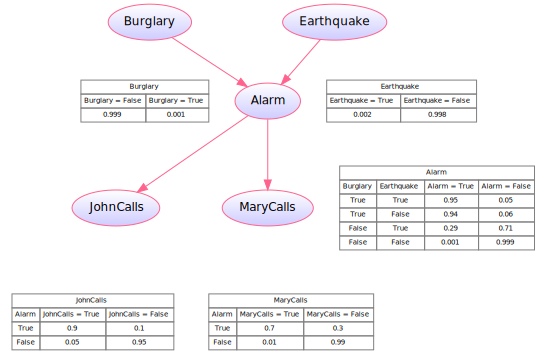

In [8]:
pgmpyToGraphCPD(model = alarmModel, shorten = False)

In [9]:
# ### Study: Independencies of the Alarm Model

In [10]:
alarmModel.local_independencies('Burglary')

(Burglary _|_ Earthquake)

In [11]:
alarmModel.local_independencies('Earthquake')

(Earthquake _|_ Burglary)

In [12]:
alarmModel.local_independencies('Alarm')

In [13]:
print(alarmModel.local_independencies('MaryCalls'))

indepSynonymTable(model = alarmModel, queryNode = 'MaryCalls')

(MaryCalls _|_ Earthquake, JohnCalls, Burglary | Alarm)
                                                       INDEPENDENCIES TABLE                                                      
Fancy Notation                                                  .....     Regular Notation                                       
---------------------------------------------------------------------------------------------------------------------------------
(MaryCalls _|_ {Earthquake ∩ JohnCalls ∩ Burglary} | Alarm)     .....     (MaryCalls _|_ Earthquake, JohnCalls, Burglary | Alarm)
(MaryCalls _|_ {Earthquake ∩ Burglary ∩ JohnCalls} | Alarm)     .....     (MaryCalls _|_ Earthquake, Burglary, JohnCalls | Alarm)
(MaryCalls _|_ {JohnCalls ∩ Earthquake ∩ Burglary} | Alarm)     .....     (MaryCalls _|_ JohnCalls, Earthquake, Burglary | Alarm)
(MaryCalls _|_ {JohnCalls ∩ Burglary ∩ Earthquake} | Alarm)     .....     (MaryCalls _|_ JohnCalls, Burglary, Earthquake | Alarm)
(MaryCalls _|_ {Burglary ∩ Earthqu

In [14]:
print(alarmModel.local_independencies('JohnCalls'))

indepSynonymTable(model = alarmModel, queryNode = 'JohnCalls')

(JohnCalls _|_ Burglary, Earthquake, MaryCalls | Alarm)
                                                       INDEPENDENCIES TABLE                                                      
Fancy Notation                                                  .....     Regular Notation                                       
---------------------------------------------------------------------------------------------------------------------------------
(JohnCalls _|_ {Burglary ∩ Earthquake ∩ MaryCalls} | Alarm)     .....     (JohnCalls _|_ Burglary, Earthquake, MaryCalls | Alarm)
(JohnCalls _|_ {Burglary ∩ MaryCalls ∩ Earthquake} | Alarm)     .....     (JohnCalls _|_ Burglary, MaryCalls, Earthquake | Alarm)
(JohnCalls _|_ {Earthquake ∩ Burglary ∩ MaryCalls} | Alarm)     .....     (JohnCalls _|_ Earthquake, Burglary, MaryCalls | Alarm)
(JohnCalls _|_ {Earthquake ∩ MaryCalls ∩ Burglary} | Alarm)     .....     (JohnCalls _|_ Earthquake, MaryCalls, Burglary | Alarm)
(JohnCalls _|_ {MaryCalls ∩ Burgla

In [15]:
alarmModel.get_independencies()



(Burglary _|_ Earthquake)
(Burglary _|_ JohnCalls, MaryCalls | Alarm)
(Burglary _|_ JohnCalls, MaryCalls | Alarm, Earthquake)
(Burglary _|_ MaryCalls | JohnCalls, Alarm)
(Burglary _|_ JohnCalls | Alarm, MaryCalls)
(Burglary _|_ MaryCalls | Alarm, JohnCalls, Earthquake)
(Burglary _|_ JohnCalls | Alarm, Earthquake, MaryCalls)
(Earthquake _|_ Burglary)
(Earthquake _|_ JohnCalls, MaryCalls | Alarm)
(Earthquake _|_ JohnCalls, MaryCalls | Alarm, Burglary)
(Earthquake _|_ MaryCalls | JohnCalls, Alarm)
(Earthquake _|_ JohnCalls | Alarm, MaryCalls)
(Earthquake _|_ MaryCalls | Alarm, JohnCalls, Burglary)
(Earthquake _|_ JohnCalls | Alarm, Burglary, MaryCalls)
(JohnCalls _|_ Burglary, Earthquake, MaryCalls | Alarm)
(JohnCalls _|_ Earthquake, MaryCalls | Alarm, Burglary)
(JohnCalls _|_ Burglary, MaryCalls | Alarm, Earthquake)
(JohnCalls _|_ Burglary, Earthquake | Alarm, MaryCalls)
(JohnCalls _|_ MaryCalls | Earthquake, Alarm, Burglary)
(JohnCalls _|_ Earthquake | Alarm, Burglary, MaryCalls)
(JohnC

In [16]:
# TODO say direct dependency assumptions (from Korb book)

In [17]:
# TODO test imap in pgmpy and meaning? (from Korb book)

G = BayesianModel([('diff', 'grade'), ('intel', 'grade')])
diff_cpd = TabularCPD('diff', 2, [[0.2], [0.8]])
intel_cpd = TabularCPD('intel', 3, [[0.5], [0.3], [0.2]])
grade_cpd = TabularCPD('grade', 3, [[0.1,0.1,0.1,0.1,0.1,0.1],
                                    [0.1,0.1,0.1,0.1,0.1,0.1],
                                    [0.8,0.8,0.8,0.8,0.8,0.8]],
                       evidence=['diff', 'intel'], evidence_card=[2, 3])

G.add_cpds(diff_cpd, intel_cpd, grade_cpd)
val = [0.01, 0.01, 0.08, 0.006, 0.006, 0.048, 0.004, 0.004, 0.032,
           0.04, 0.04, 0.32, 0.024, 0.024, 0.192, 0.016, 0.016, 0.128]

JPD = JointProbabilityDistribution(['diff', 'intel', 'grade'], [2, 3, 3], val)
G.is_imap(JPD)

True

In [18]:
from operator import mul
from functools import reduce

factors = [cpd.to_factor() for cpd in alarmModel.get_cpds()]; factors

factor_prod = reduce(mul, factors); factor_prod

print(factor_prod)

+-----------------+-------------------+--------------+------------------+------------------+------------------------------------------------------+
| Burglary        | Earthquake        | Alarm        | JohnCalls        | MaryCalls        |   phi(Burglary,Earthquake,Alarm,JohnCalls,MaryCalls) |
+=================+===================+==============+==================+==================+======================================================+
| Burglary(True)  | Earthquake(True)  | Alarm(True)  | JohnCalls(True)  | MaryCalls(True)  |                                               0.0012 |
+-----------------+-------------------+--------------+------------------+------------------+------------------------------------------------------+
| Burglary(True)  | Earthquake(True)  | Alarm(True)  | JohnCalls(True)  | MaryCalls(False) |                                               0.0005 |
+-----------------+-------------------+--------------+------------------+------------------+--------------------

In [19]:
# TODO do part 3 Joint dist from tut2
# TODO do part 4 inference from tut3
# TODO do the different kinds of inference from (Korb book): intercausal, diagnostic ... etc